# Alphabet uses matplothlib to draw a custom message in a 5x7 dot matrix

The user can enter upto three lines of text and the result will be matplotlib figure with the text printed in a 5x7 led-like dot-matrix (like the ones used to disply messages on the streets).


## How it works:
- Enter the text you want to display inside single quotes:   
    - text = ['`You`', '`are welcome`', '`to try`', '`your own text`']
    - Text between each pair of single quotes represents a line
    - Each character is represented in one subplot
    - The amount of words/lines is limited based on matplotlib capabilities or the system running it.

## The logic behind:
- python 3.7 string.printable contains 100 characters:
    - \'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'
- the last few characters are not visible when printed on my display:
    - space	' '	[index 94]
    - tab	'\t'
    - linefeed	'\n'
    - return	'\r'
    - formfeed	'\x0b'
    - vertical tab	'\x0c'	[index 99]
    - These will print an empty plot
- a dataframe is loaded with the pre-defined (x, y) coordinates for each one of the charaters.
    - how these coordinates where built can be seen in the excel file on this repository.
- loading a list of values into pandas is achieved by adding a ';' betweent the `x` and `y` values and using it as separator when reading the file
- The `x` and `y` columns need to be converted to list using `literal_eval` otherwise these will be considered as strings when loaded from csv. `converters={'x' : eval, 'y' : eval}`
- A figure with dimensions rows * columns (text_lines * longest_text_line) is created
- The text is scanned line by line, char by char and `string.printable` is used to find the index for that character.
- The index from `string.printable` is the same as the index in the DataFrame.   Using this index the (x, y) coordinates are located in the DataFrame and made available to be plot. 
- Using matplotlib the charater is plotted on it's repective space. 

**Note: the color for each character is random based on the `colors` list.  Intentionally the white 'w` and yellow `y` are removed from the random selection `random.randint(0, len(colors)-3)` as these are hard to see when the background is white.**

- If you want to use a single color for all the characters, you can remove the `#` on this line `#font_color = 'k'` and set your favorite color

- Want to save the text to a file? remove the `#` from the line `#plt.savefig`
- Want to customize the markers... see [matplotlib.markers](https://matplotlib.org/3.1.1/api/markers_api.html?highlight=matplotlib%20markers#module-matplotlib.markers) and the last cells for an example

- There are some custom "figures" loaded in the dataframe index 100+ these cannot be indexed by `string.printable`, are here to play with.   see last cells on this book


In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import random # to pickup a random color per letter

# set each character size
h = 7
w = 5

# Load the DataFrame
df = pd.read_csv('alphabet_xy.txt', header=None, sep=';', names=(['x', 'y']), converters={'x' : eval, 'y' : eval})


## Enter the desired text below (inside the single quotes)

In [2]:
text = ['You', 'are welcome', 'to try', 'your own text']

### using a white background

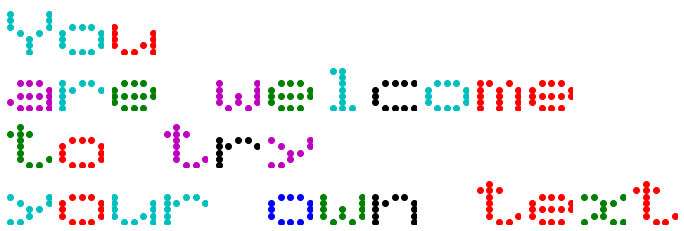

In [3]:
# load colors for the dots
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'w', 'y']

# determine the max number of rows and columns for the plot
max_rows = len(text)
max_cols = max(len(x) for x in text)
#print('Number of rows {}\r\nNumber of Columns: {}'.format(max_rows, max_cols))

fig, axs = plt.subplots(max_rows, max_cols, sharex=True, sharey=True, 
                        constrained_layout=False, gridspec_kw={'hspace': 0.0})
fig.set_size_inches(max_cols-1, max_rows, forward=True)

for i in range(max_rows):
    for j in range(max_cols):
        font_color = colors[random.randint(0, len(colors)-3)]
        #font_color = 'k'
        axs = plt.subplot2grid((max_rows, max_cols), (i,j))
        #print('{} {} {} {}'.format(i, j, max_rows, max_cols))
        try:
            idx = string.printable.find(text[i][j])
            axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'], c=font_color)
            plt.xlim([-0.3, 4.2])
            plt.ylim([-0.3, 7.2])
            plt.axis('off')
        except:
            idx = 94 # space
            axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'])
            plt.axis('off')
#plt.savefig('./dot_matrix_w.png', format='png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show();
plt.close('all')

### Using a different background

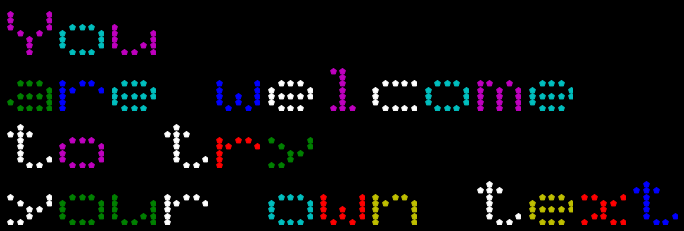

In [4]:
# move the black 'k' to the end to avoid using it for the dots
colors = ['b', 'w', 'r', 'c', 'm', 'y', 'g', 'k']

# enter the backgroud color
your_color = 'k'

# determine the max number of rows and columns for the plot
max_rows = len(text)
max_cols = max(len(x) for x in text)
#print('Number of rows {}\r\nNumber of Columns: {}'.format(max_rows, max_cols))

fig, axs = plt.subplots(max_rows, max_cols, sharex=True, sharey=True, 
                        constrained_layout=False, gridspec_kw={'hspace': 0.0})
fig.set_size_inches(max_cols-1, max_rows, forward=True)
fig.set_facecolor(your_color)
for i in range(max_rows):
    for j in range(max_cols):
        font_color = colors[random.randint(0, len(colors)-2)]
        #font_color = 'y'
        axs = plt.subplot2grid((max_rows, max_cols), (i,j))
        #print('{} {} {} {}'.format(i, j, max_rows, max_cols))
        try:
            idx = string.printable.find(text[i][j])
            axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'], c=font_color, marker='p')
            plt.xlim([-0.3, 4.2])
            plt.ylim([-0.3, 7.2])
            plt.axis('off')
        except:
            idx = 94 # space
            axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'])
            plt.axis('off')
#plt.savefig('./dot_matrix_k.png', format='png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show();
plt.close('all')

# Customize the Markers

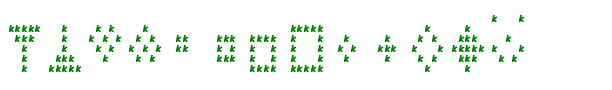

In [5]:
# Figures not in string.printable but loaded into the DataFrame
max_cols = len(df) - len(string.printable)
fig, axs = plt.subplots(1, max_cols, sharex=True, sharey=True)

fig.set_size_inches(w/h*max_cols, h/w)

for j in range(max_cols):
    axs = plt.subplot2grid((1, max_cols), (0,j))
    try:
        idx = j + len(string.printable)
        axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'], c='g', marker='$k$')
        plt.xlim([-0.5, 4.5])
        plt.ylim([-0.5, 7.1])
        plt.axis('off')
    except:
        idx = 94 # space
        axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'])
        plt.axis('off')

plt.show();

In [6]:
# Load the DataFrame
markers = pd.read_csv('markers.txt', header=1, sep=';', skiprows=0)
markers.iloc[[0, 24, -1]]

,marker,description
0,.,point
24,_,hline
36,11,(CARETDOWNBASE


In [7]:
type(markers.iloc[36]['marker'])

str

In [8]:
string.printable.find('A')

36

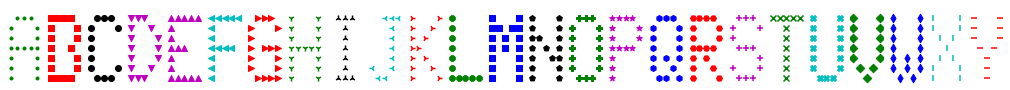

In [9]:
# first 25 markers that are strings not numeric

# load colors for the dots
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'w', 'y']

max_cols = 25 
fig, axs = plt.subplots(1, max_cols, sharex=True, sharey=True)

fig.set_size_inches(w/h*max_cols, h/w)

for j in range(max_cols):
    axs = plt.subplot2grid((1, max_cols), (0,j))
    try:
        font_color = colors[random.randint(0, len(colors)-3)]
        #font_color = 'b'
        idx = j + 36
        axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'], c=font_color, marker=markers.iloc[j]['marker'])
        plt.xlim([-0.5, 4.5])
        plt.ylim([-0.5, 7.1])
        plt.axis('off')
    except:
        idx = 94 # space
        axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'])
        plt.axis('off')
#plt.savefig('./dot_matrix__markers_AY.png', format='png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show();

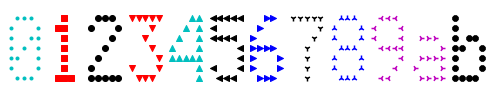

In [10]:
# last 12 markers that are numeric

# load colors for the dots
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'w', 'y']

max_cols = 12
fig, axs = plt.subplots(1, max_cols, sharex=True, sharey=True)

fig.set_size_inches(w/h*max_cols, h/w)

for j in range(max_cols):
    axs = plt.subplot2grid((1, max_cols), (0,j))
    try:
        font_color = colors[random.randint(0, len(colors)-3)]
        #font_color = 'b'
        idx = j + 0
        axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'], c=font_color, marker=markers.iloc[j]['marker'])
        plt.xlim([-0.5, 4.5])
        plt.ylim([-0.5, 7.1])
        plt.axis('off')
    except:
        idx = 94 # space
        axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'])
        plt.axis('off')
#plt.savefig('./dot_matrix__markers_0b.png', format='png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show();

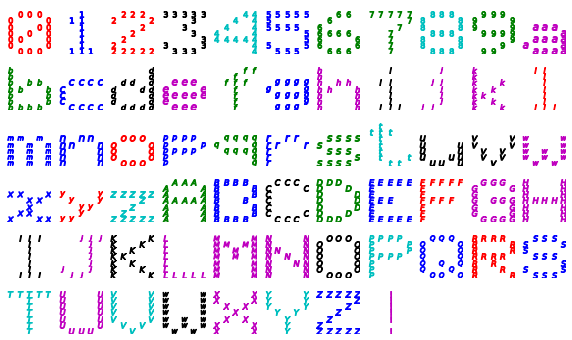

In [11]:
# using the '$..$' marker style
import textwrap
text = textwrap.wrap(string.printable[0:63], 11)

# set each character size
h = 21
w = 15

# load colors for the dots
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'w', 'y']

# determine the max number of rows and columns for the plot
max_rows = len(text)
max_cols = max(len(x) for x in text)
#print('Number of rows {}\r\nNumber of Columns: {}'.format(max_rows, max_cols))

fig, axs = plt.subplots(max_rows, max_cols, sharex=True, sharey=True, 
                        constrained_layout=False, gridspec_kw={'hspace': 0.0})
fig.set_size_inches(max_cols-1, max_rows, forward=True)
k = 0
for i in range(max_rows):
    for j in range(max_cols):
        font_color = colors[random.randint(0, len(colors)-3)]
        #font_color = 'k'
        axs = plt.subplot2grid((max_rows, max_cols), (i,j))
        #print('{} {} {} {}'.format(i, j, max_rows, max_cols))
        try:
            idx = string.printable.find(text[i][j])
            strj = '$' + str(string.printable[idx]) + '$'
            axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'], c=font_color, marker=strj)
            plt.xlim([-0.3, 4.2])
            plt.ylim([-0.3, 7.2])
            plt.axis('off')
        except:
            idx = 94 # space
            axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'])
            plt.axis('off')
#plt.savefig('./dot_matrix_w_063.png', format='png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show();
plt.close('all')

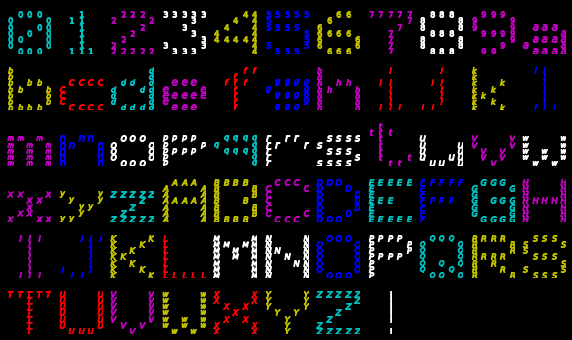

In [12]:
# using the '$..$' marker style
import textwrap
text = textwrap.wrap(string.printable[0:63], 11)

# set each character size
h = 21
w = 15

# move the black 'k' to the end to avoid using it for the dots
colors = ['b', 'w', 'r', 'c', 'm', 'y', 'g', 'k']

# enter the backgroud color
your_color = 'k'

# determine the max number of rows and columns for the plot
max_rows = len(text)
max_cols = max(len(x) for x in text)
#print('Number of rows {}\r\nNumber of Columns: {}'.format(max_rows, max_cols))

fig, axs = plt.subplots(max_rows, max_cols, sharex=True, sharey=True, 
                        constrained_layout=False, gridspec_kw={'hspace': 0.0})
fig.set_size_inches(max_cols-1, max_rows, forward=True)
fig.set_facecolor(your_color)
k = 0
for i in range(max_rows):
    for j in range(max_cols):
        font_color = colors[random.randint(0, len(colors)-3)]
        #font_color = 'k'
        axs = plt.subplot2grid((max_rows, max_cols), (i,j))
        #print('{} {} {} {}'.format(i, j, max_rows, max_cols))
        try:
            idx = string.printable.find(text[i][j])
            strj = '$' + str(string.printable[idx]) + '$'
            axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'], c=font_color, marker=strj)
            plt.xlim([-0.3, 4.2])
            plt.ylim([-0.3, 7.2])
            plt.axis('off')
        except:
            idx = 94 # space
            axs.scatter(df.iloc[idx]['x'], df.iloc[idx]['y'])
            plt.axis('off')
#plt.savefig('./dot_matrix_k_063.png', format='png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show();
plt.close('all')